# Explore

In [31]:
import os
import json
import pandas as pd

## Loading the Data from Sample Stage

In [32]:
stage1_sample_path = '../01_Sample/actors_meta_df.csv'
df = pd.DataFrame()
# Check if the zip file exists
if os.path.exists(stage1_sample_path):
    print('Loading the zip file: ' + os.path.basename(stage1_sample_path))
    df = pd.read_csv(stage1_sample_path)
else:
    print('Csv file not found in 01_Sample. Please check the directory. Make sure you run python sample.py first.')
# testing that the shards are converted to the correct format (json string)
# convert the json stringa back to a list of lists for the list of list features using json.loads
df['spectral_centroid'] = df['spectral_centroid'].apply(lambda x: json.loads(x))
df['spectral_bandwidth'] = df['spectral_bandwidth'].apply(lambda x: json.loads(x))
df['spectral_rolloff'] = df['spectral_rolloff'].apply(lambda x: json.loads(x))
df['zero_crossing_rate'] = df['zero_crossing_rate'].apply(lambda x: json.loads(x))
df['chroma_stft'] = df['chroma_stft'].apply(lambda x: json.loads(x))
df['mfcc'] = df['mfcc'].apply(lambda x: json.loads(x))
df['rmse'] = df['rmse'].apply(lambda x: json.loads(x))
df['onset_env'] = df['onset_env'].apply(lambda x: json.loads(x))
df['y'] = df['y'].apply(lambda x: json.loads(x))

Loading the zip file: actors_meta_df.csv


## Converting Audio Data to numerical data and retriving labels from metadata

In [34]:
df.head()

,actor,tempo,y,sr,onset_env,spectral_centroid,spectral_bandwidth,spectral_rolloff,zero_crossing_rate,chroma_stft,mfcc,rmse,modality,vocal_channel,emotion,emotional_intensity,statement,repetition
0,Actor_11,83.354335,"[-4.1964165575336665e-05, -6.885814946144819e-...",22050,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.5369328260421753, ...","[[3305.681736617078, 3809.400210109509, 4254.4...","[[3300.888911293997, 3360.0111898209984, 3240....","[[7827.3193359375, 8171.8505859375, 8311.81640...","[[0.13427734375, 0.25, 0.314453125, 0.33837890...","[[0.9302664995193481, 0.9860062003135681, 0.73...","[[-883.4555053710938, -893.8783569335938, -901...","[[1.6108253475977108e-05, 1.6326030163327232e-...",3,1,1,1,2,2
1,Actor_11,71.777344,"[3.963866038247943e-05, 8.013407932594419e-05,...",22050,"[0.0, 0.0, 0.0, 0.2873375415802002, 0.25994974...","[[2806.2260232447206, 3550.7743308097256, 3662...","[[3211.7066378204213, 3329.503055299506, 3278....","[[7095.1904296875, 7913.4521484375, 7913.45214...","[[0.0751953125, 0.17822265625, 0.19287109375, ...","[[1.0, 1.0, 0.8694581985473633, 0.613543748855...","[[-887.3533935546875, -892.3982543945312, -898...","[[2.7592388505581766e-05, 3.107071097474545e-0...",3,1,2,1,2,1
2,Actor_11,99.384014,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,"[0.0, 0.0, 0.0, 1.2474737167358398, 0.78880399...","[[2300.024697765367, 2608.3085662666576, 3628....","[[3202.360377039719, 3266.0767073783027, 3358....","[[6804.4921875, 7084.423828125, 8021.118164062...","[[0.13623046875, 0.18994140625, 0.2802734375, ...","[[0.8779793977737427, 0.6921616196632385, 0.62...","[[-924.48291015625, -910.8308715820312, -910.0...","[[5.010519453207962e-05, 5.149727803654969e-05...",3,1,2,2,1,1
3,Actor_11,161.499023,"[1.5243997040670365e-05, 1.3807131836074404e-0...",22050,"[0.0, 0.0, 0.0, 0.10534670948982239, 0.0921120...","[[3286.8306944711185, 3335.675485983033, 3444....","[[3321.0458692779025, 3356.6809595639897, 3383...","[[7698.1201171875, 7870.3857421875, 7999.58496...","[[0.14453125, 0.19091796875, 0.2431640625, 0.2...","[[0.8598794937133789, 0.7624518871307373, 0.53...","[[-842.189208984375, -841.1368408203125, -840....","[[2.4441273126285523e-05, 3.232677772757597e-0...",3,1,3,1,1,2
4,Actor_11,51.679688,"[8.7517146312166e-05, 0.00013253894576337188, ...",22050,"[0.0, 0.0, 0.0, 0.010161399841308594, 0.034371...","[[2361.408732526411, 2765.001568121494, 2920.2...","[[3101.7483706848116, 3278.125756621847, 3288....","[[6449.1943359375, 7256.689453125, 7396.655273...","[[0.0224609375, 0.09765625, 0.248046875, 0.255...","[[0.8078288435935974, 0.40341416001319885, 0.4...","[[-658.903076171875, -659.3871459960938, -659....","[[5.8222438383381814e-05, 6.489652150776237e-0...",3,1,3,2,2,2


**Here's a brief overview of the features extracted and their relevance:**

**Tempo:** The speed at which a piece of music is played. It's crucial for music analysis and can be important for understanding rhythm in speech.

**y (Audio Signal):** The raw audio data. It's the foundation from which all other features are derived.

**sr (Sample Rate):** The number of samples of audio carried per second. It's fundamental to digital audio processing.

**Onset_env (Onset Envelope):** Represents the times at which notes, chords, or percussive sounds start. It's useful in rhythm and beat detection.

**Spectral Centroid:** Indicates where the "center of mass" for a sound is located on the frequency spectrum and is often associated with the brightness of the sound.

**Spectral Bandwidth:** Relates to the width of the spectral centroid's spread. It gives an idea about the range of frequencies present in the sound.

**Spectral Rolloff:** A measure of the shape of the signal. It represents the frequency below which a certain percentage of the total spectral energy is contained.

**Zero Crossing Rate:** The rate at which the signal changes from positive to negative or back. This feature is often used in speech/music discrimination and for classification of percussive sounds.

**Chroma STFT (Short-Time Fourier Transform):** A representation of the music’s harmonic content. It's useful in identifying chords and understanding tonal content.

**MFCC (Mel-Frequency Cepstral Coefficients):** Particularly important in speech and audio signal processing for timbre recognition, as they capture the timbral aspects.

**RMSE (Root Mean Square Energy):** A measure of the power of the audio signal. It's used to detect silence and compare loudness across clips.

In [35]:
df.describe()

,tempo,sr,modality,vocal_channel,emotion,emotional_intensity,statement,repetition
count,1440.000000,1440.0,1440.0,1440.0,1440.000000,1440.000000,1440.000000,1440.000000
mean,125.034286,22050.0,3.0,1.0,4.733333,1.466667,1.500000,1.500000
std,41.610986,0.0,0.0,0.0,2.175356,0.499061,0.500174,0.500174
min,43.796345,22050.0,3.0,1.0,1.000000,1.000000,1.000000,1.000000
25%,92.285156,22050.0,3.0,1.0,3.000000,1.000000,1.000000,1.000000
50%,123.046875,22050.0,3.0,1.0,5.000000,1.000000,1.500000,1.500000
75%,151.999081,22050.0,3.0,1.0,7.000000,2.000000,2.000000,2.000000
max,234.907670,22050.0,3.0,1.0,8.000000,2.000000,2.000000,2.000000


NOTE: Since the correlation is zero, we can drop the columns

In [36]:
df['emotion'].corr(df['repetition']), df['emotional_intensity'].corr(df['repetition']), df['emotional_intensity'].corr(df['statement']), df['emotion'].corr(df['statement'])

(1.7018035299991737e-18, 0.0, -4.9453264060181235e-18, -8.509017649995869e-19)

**Facts and Observations:**

Modality (01 = full-AV, 02 = video-only, 03 = audio-only)
As we are only working with Audio Data, modality is 3 throughout.

Vocal channel (01 = speech, 02 = song).
There is no data with an actor singing, so only speech data.

Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
This is one of the Target Variable, Emotion Detection.

Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
This is one of the Target variable, to determine the intensity

Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
To determine the statement by an actor is too specific to identify and isn't the goal.

Repetition (01 = 1st repetition, 02 = 2nd repetition).
Every Statement in particular Emotion and Emotional Intensity is recorded twice by an actor thus there is a repetition of the same audio that might be minimally different.

Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

**Actions**

We'll be dropping the:

actor, modality, vocal_channel, statement, repetition

**Target Features:**

Emotion and Emotional Intensity


In [37]:
columns_to_drop = ['actor', 'modality', 'vocal_channel', 'statement', 'repetition']

# Drop the columns
df = df.drop(columns_to_drop, axis=1)

df.head()

,tempo,y,sr,onset_env,spectral_centroid,spectral_bandwidth,spectral_rolloff,zero_crossing_rate,chroma_stft,mfcc,rmse,emotion,emotional_intensity
0,83.354335,"[-4.1964165575336665e-05, -6.885814946144819e-...",22050,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.5369328260421753, ...","[[3305.681736617078, 3809.400210109509, 4254.4...","[[3300.888911293997, 3360.0111898209984, 3240....","[[7827.3193359375, 8171.8505859375, 8311.81640...","[[0.13427734375, 0.25, 0.314453125, 0.33837890...","[[0.9302664995193481, 0.9860062003135681, 0.73...","[[-883.4555053710938, -893.8783569335938, -901...","[[1.6108253475977108e-05, 1.6326030163327232e-...",1,1
1,71.777344,"[3.963866038247943e-05, 8.013407932594419e-05,...",22050,"[0.0, 0.0, 0.0, 0.2873375415802002, 0.25994974...","[[2806.2260232447206, 3550.7743308097256, 3662...","[[3211.7066378204213, 3329.503055299506, 3278....","[[7095.1904296875, 7913.4521484375, 7913.45214...","[[0.0751953125, 0.17822265625, 0.19287109375, ...","[[1.0, 1.0, 0.8694581985473633, 0.613543748855...","[[-887.3533935546875, -892.3982543945312, -898...","[[2.7592388505581766e-05, 3.107071097474545e-0...",2,1
2,99.384014,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,"[0.0, 0.0, 0.0, 1.2474737167358398, 0.78880399...","[[2300.024697765367, 2608.3085662666576, 3628....","[[3202.360377039719, 3266.0767073783027, 3358....","[[6804.4921875, 7084.423828125, 8021.118164062...","[[0.13623046875, 0.18994140625, 0.2802734375, ...","[[0.8779793977737427, 0.6921616196632385, 0.62...","[[-924.48291015625, -910.8308715820312, -910.0...","[[5.010519453207962e-05, 5.149727803654969e-05...",2,2
3,161.499023,"[1.5243997040670365e-05, 1.3807131836074404e-0...",22050,"[0.0, 0.0, 0.0, 0.10534670948982239, 0.0921120...","[[3286.8306944711185, 3335.675485983033, 3444....","[[3321.0458692779025, 3356.6809595639897, 3383...","[[7698.1201171875, 7870.3857421875, 7999.58496...","[[0.14453125, 0.19091796875, 0.2431640625, 0.2...","[[0.8598794937133789, 0.7624518871307373, 0.53...","[[-842.189208984375, -841.1368408203125, -840....","[[2.4441273126285523e-05, 3.232677772757597e-0...",3,1
4,51.679688,"[8.7517146312166e-05, 0.00013253894576337188, ...",22050,"[0.0, 0.0, 0.0, 0.010161399841308594, 0.034371...","[[2361.408732526411, 2765.001568121494, 2920.2...","[[3101.7483706848116, 3278.125756621847, 3288....","[[6449.1943359375, 7256.689453125, 7396.655273...","[[0.0224609375, 0.09765625, 0.248046875, 0.255...","[[0.8078288435935974, 0.40341416001319885, 0.4...","[[-658.903076171875, -659.3871459960938, -659....","[[5.8222438383381814e-05, 6.489652150776237e-0...",3,2


Saving the modified data

In [39]:
df.columns

Index(['tempo', 'y', 'sr', 'onset_env', 'spectral_centroid',
       'spectral_bandwidth', 'spectral_rolloff', 'zero_crossing_rate',
       'chroma_stft', 'mfcc', 'rmse', 'emotion', 'emotional_intensity'],
      dtype='object')

In [40]:
output_csv_file = './actors_labeled_df.csv'

# Save the DataFrame having no-list features as a CSV file for a fixed-length model
df = df.loc[:, ['tempo', 'sr', 'emotion', 'emotional_intensity']]

df.to_csv(output_csv_file, index=False)

Loading the modified file

In [41]:
import pandas as pd

explore_data = './actors_labeled_df.csv'

# Save the DataFrame as a CSV file
data_visuals = pd.read_csv(explore_data) # variable initiated for visulization purposes
df = pd.read_csv(explore_data)

In [43]:
data_visuals.shape

(1440, 4)

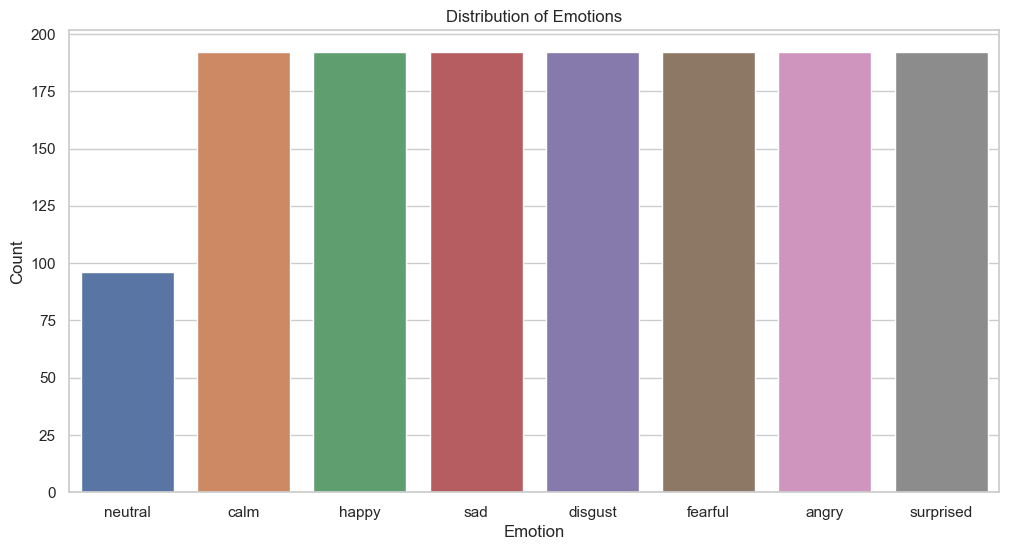

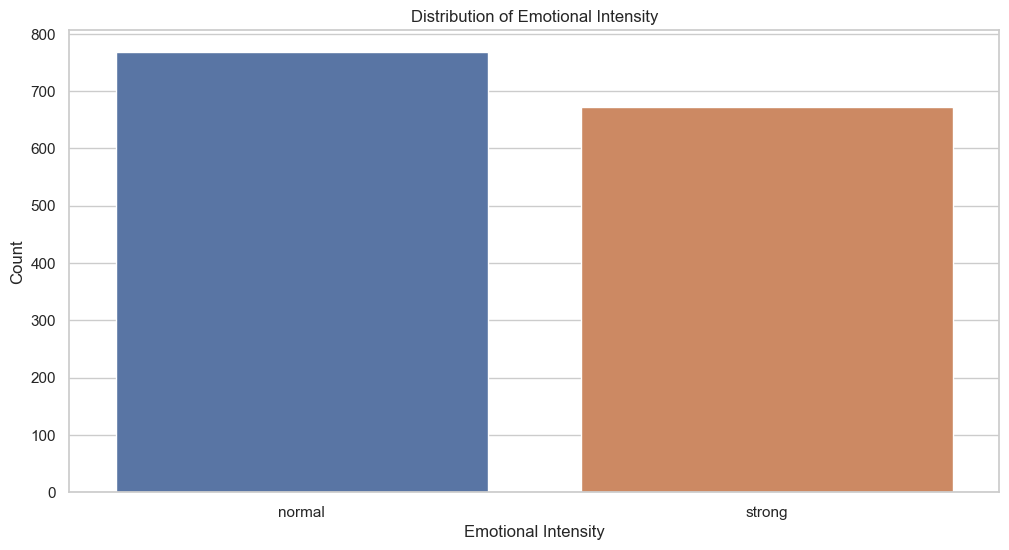

In [44]:
from ctypes import DEFAULT_MODE
# For Better Visualizations mapping the data
# Mapping for 'emotion' and 'emotional_intensity'
emotion_mapping = {
    1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad',
    5: 'angry', 6: 'fearful', 7: 'disgust', 8: 'surprised'
}
emotional_intensity_mapping = {1: 'normal', 2: 'strong'}

# Updating the dataset with these mappings
data_visuals['emotion'] = df['emotion'].map(emotion_mapping)
data_visuals['emotional_intensity'] = df['emotional_intensity'].map(emotional_intensity_mapping)

import matplotlib.pyplot as plt
import seaborn as sns

# Re-setting the aesthetics for the plots
sns.set(style="whitegrid")

# Distribution of the 'emotion' variable
plt.figure(figsize=(12, 6))
sns.countplot(x='emotion', data=data_visuals)
plt.title('Distribution of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

# Distribution of the 'emotional_intensity' variable
plt.figure(figsize=(12, 6))
sns.countplot(x='emotional_intensity', data=data_visuals)
plt.title('Distribution of Emotional Intensity')
plt.xlabel('Emotional Intensity')
plt.ylabel('Count')
plt.show()

### **Emotions:**

01 = neutral

02 = calm

03 = happy

04 = sad

05 = angry

06 = fearful

07 = disgust

08 = surprised

### **Emotional Intensity:**

01 = normal

02 = strong

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tempo                1440 non-null   float64
 1   sr                   1440 non-null   int64  
 2   emotion              1440 non-null   int64  
 3   emotional_intensity  1440 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 45.1 KB


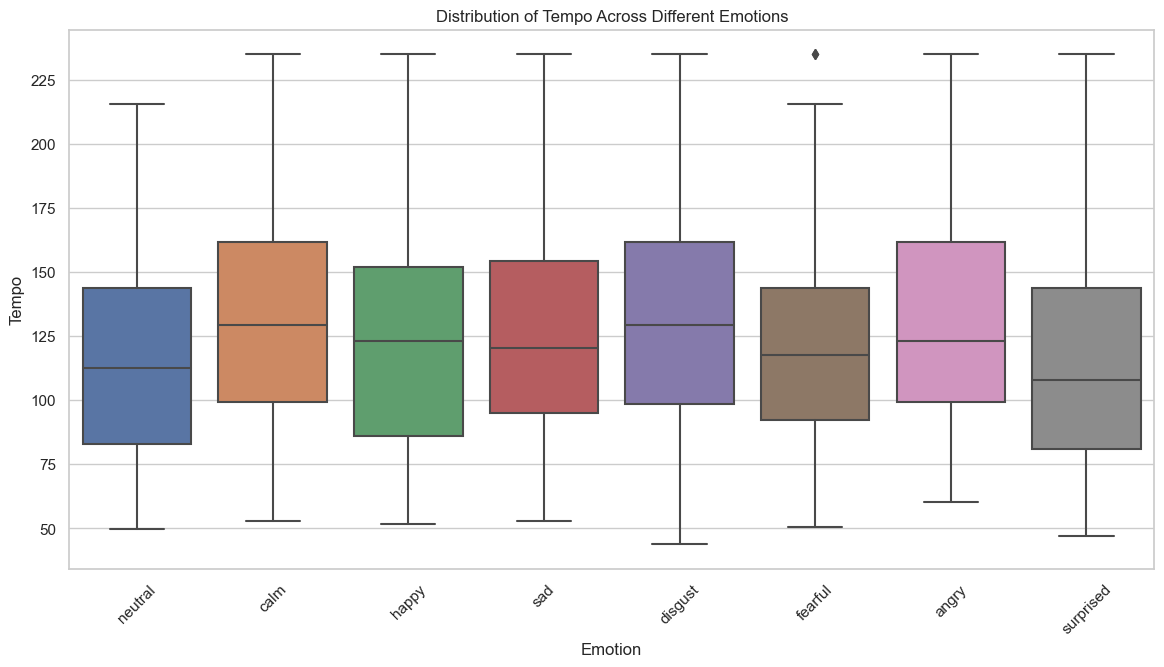

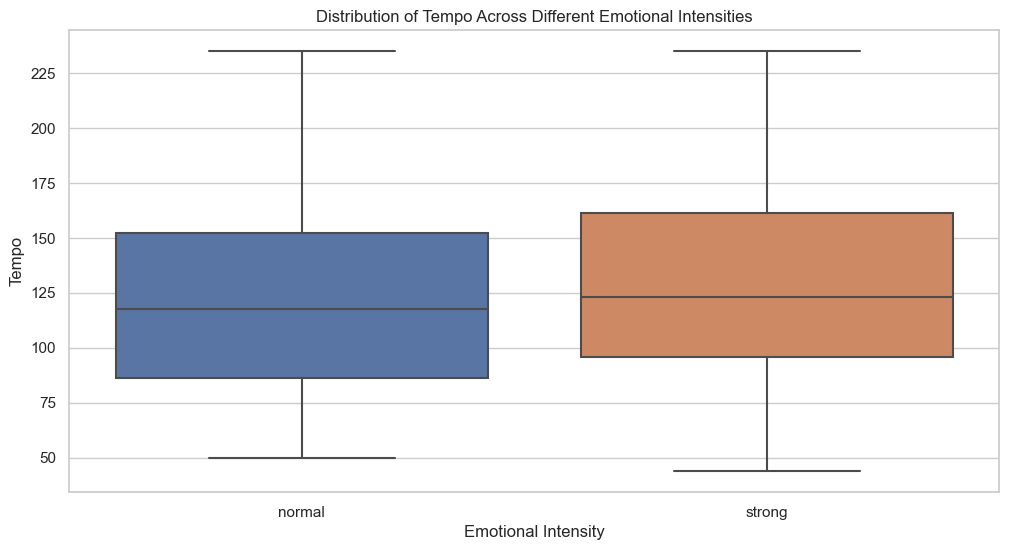

In [46]:
# Plotting the distribution of 'tempo' across different emotions
plt.figure(figsize=(14, 7))
sns.boxplot(x='emotion', y='tempo', data=data_visuals)
plt.title('Distribution of Tempo Across Different Emotions')
plt.xlabel('Emotion')
plt.ylabel('Tempo')
plt.xticks(rotation=45)
plt.show()

# Plotting the distribution of 'tempo' across different emotional intensities
plt.figure(figsize=(12, 6))
sns.boxplot(x='emotional_intensity', y='tempo', data=data_visuals)
plt.title('Distribution of Tempo Across Different Emotional Intensities')
plt.xlabel('Emotional Intensity')
plt.ylabel('Tempo')
plt.show()

In [47]:
#Calculating the corelation between the Target Variables
Target_corelation = df['emotion'].corr(df['emotional_intensity'])

Target_corelation

0.11470786693528079

### **Observation:**

As there is little positive corelation between the target variables, we will be making two seperate models for classification of 'emotion' and 'emotional intensity'

In [48]:
df.head()

,tempo,sr,emotion,emotional_intensity
0,83.354335,22050,1,1
1,71.777344,22050,2,1
2,99.384014,22050,2,2
3,161.499023,22050,3,1
4,51.679688,22050,3,2


Also, as all the features are derived using y(the encoded original audio and sampaling rate (constant for all audios), its better to drop them because they can't be used for modeling directly and to take care of the curse of colinearity)

In [9]:
df.emotion.unique()

array([1, 2, 3, 4, 5, 6, 7, 8])

As we know that the numbers represent a particular emotion and thus are categorical, so they need to be encoded using one hot encoding to remove the ordinality trait

For emotional Intensity encoding Normal as 0 from 1 and Strong 1 from 2, for standard encoding in binary classification and in case we might need the use neural nets in future

Let's move on to the Modification Phase :)